# Assignment - 2 [ Experience Based Salary Prediction ]

##### Importing the necessary libraries and reading the csv file "Salary.csv"

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("Salary.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [7]:
data.shape

(35, 2)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 692.0 bytes


In [12]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

##### There are no null values, so we can proceed with the next step.

##### Data Analysis - Univariate Analysis

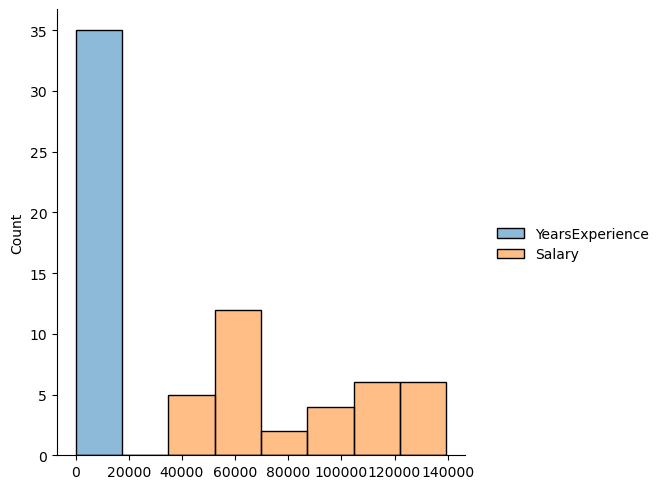

In [15]:
sns.displot(data)

<Axes: xlabel='YearsExperience'>

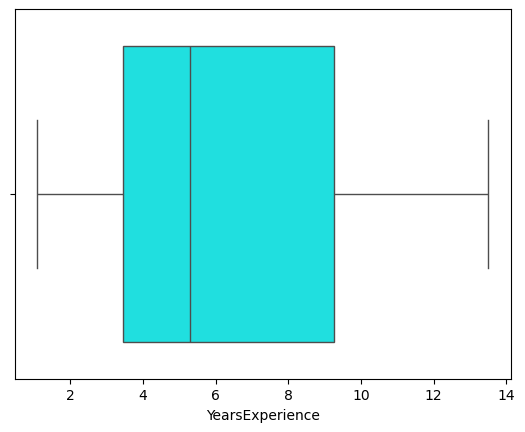

In [25]:
sns.boxplot(x = data.YearsExperience, color="cyan")

<Axes: xlabel='Salary'>

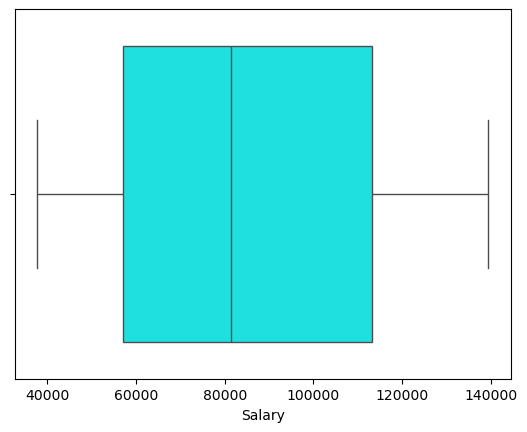

In [23]:
sns.boxplot(x = data.Salary, color="cyan")

##### There are no outliers.

##### Bivariate Analysis

<Axes: xlabel='YearsExperience', ylabel='Salary'>

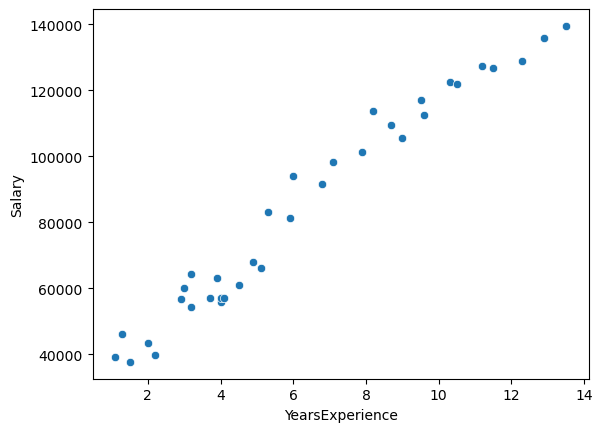

In [28]:
# scatter plot

sns.scatterplot(
    data = data,
    x = "YearsExperience",
    y = "Salary"
)

##### Now we extract X and Y (Features and Labels) from data set

In [41]:
# slicing method

X = data.iloc[:, :-1]
Y = data.iloc[:, -1:]

In [45]:
X.head(3)

,YearsExperience
0,1.1
1,1.3
2,1.5


In [47]:
Y.head(3)

,Salary
0,39343
1,46205
2,37731


##### Now we have split the data in X (Features) and Y (Labels),
##### We now have to split the data into train and test data.

In [51]:
from sklearn.model_selection import train_test_split

x1, x2, y1, y2 = train_test_split(
                        X,Y, 
                        test_size=0.2, 
                        random_state=2
                )
x1.head(3)

,YearsExperience
19,6.0
12,4.0
1,1.3


##### Now we train the model

In [54]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x1, y1)

LinearRegression()

##### We can check the intercept and coefficients

In [57]:
c = model.intercept_
m = model.coef_
print(f"Intercept c: {c} \nCoefficients m: {m}")

Intercept c: [29821.64134896] 
Coefficients m: [[8672.22499846]]


##### Trying to add a new value to our model to predict

In [69]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

new = [[1.7]]
model.predict(new)

array([[44564.42384633]])

In [71]:
x2[:5]

,YearsExperience
13,4.1
14,4.5
26,9.5
9,3.7
28,10.3


##### We predict for the values of x2

In [74]:
predicted = model.predict(x2)
predicted

array([[ 65377.76384262],
       [ 68846.65384201],
       [112207.77883428],
       [ 61908.87384324],
       [119145.55883305],
       [136490.00882996],
       [ 39361.08884726]])

##### Finding the score (accuracy) of the model prediction

In [76]:
model.score(x2, y2)*100

97.13897949584879

##### our model is 97.13% accurate

##### Let's plot a graph to view the the final predicted line

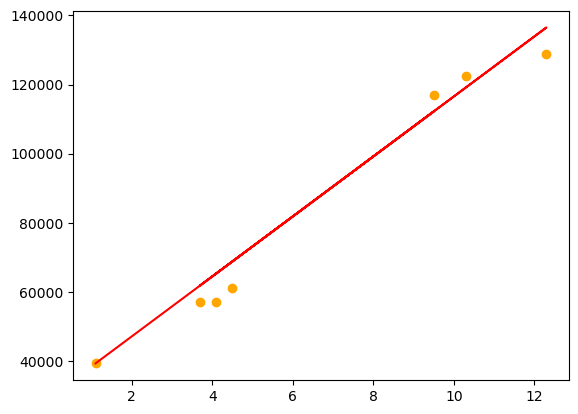

In [81]:
plt.plot(x2, predicted, c="red")
plt.scatter(x2, y2, c="orange")
plt.show()

##### ----- THE END -----